# Validação do modelo de Churn
* Aplicado o Recente em todos e utilizando o cálculo de períodos.
---

**Autor(a):** Sabrina Bruni de Souza Faria

## Importando Bibliotecas

In [1]:
import pandas as pd
import csv
from funçoesAuxiliares import *

## Leitura dos dados

In [2]:
df = pd.read_csv('Arquivos/TesteTreinoChurn.csv')
df.head(5)

,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Churn,resultado
0,0.306844,0.298981,0.248598,0.287129,0.280981,não churn
1,0.375673,0.665238,0.730897,0.392739,0.390033,não churn
2,0.259749,0.534367,0.643994,0.254125,0.250033,não churn
3,0.304933,0.534367,0.643994,0.293729,0.290033,não churn
4,0.364491,0.550020,0.648253,0.366337,0.356969,não churn


In [3]:
df.describe()

,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Churn
count,4500.000000,4.500000e+03,4500.000000,4500.000000,4500.000000
mean,0.320461,4.533954e-01,0.510960,0.340064,0.330865
std,0.106855,2.506315e-01,0.298509,0.102026,0.100471
min,0.042839,1.110223e-16,0.000000,0.095238,0.080773
25%,0.255224,2.661840e-01,0.236834,0.273810,0.266091
50%,0.310149,5.333904e-01,0.643916,0.329524,0.320833
75%,0.371143,6.281308e-01,0.717964,0.387097,0.377186
max,0.966789,1.000000e+00,1.000000,0.920354,0.881561


## Variável de decisão

In [4]:
limite = 0.6

## Ajustando os dados

In [5]:
df["resultado"] = df['resultado'].apply(lambda x: 1.0 if x == "churn" else 0.0)
df["churnLinear"] = df["churnLinear"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnExponencial_2"] = df["churnExponencial_2"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnExponencial_e"] = df["churnExponencial_e"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnRecente"] = df["churnRecente"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["Churn"] = df["Churn"].apply(lambda x: 1.0 if x >= limite else 0.0)
df.head(5)

,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Churn,resultado
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


## Salvando o dataframe de churn e resultado ajustados em um arquivo CSV

In [6]:
df.to_csv( "Arquivos/TesteTreinoChurnAjustado.csv", index = False, header = True, quoting = csv.QUOTE_NONNUMERIC )

## Visualizando Estatísticas Descritivas

In [7]:
df.describe()

,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Churn,resultado
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.021556,0.263556,0.696222,0.024444,0.023111,0.004000
std,0.145243,0.440610,0.459939,0.154442,0.150273,0.063126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizando a proporção de Churns

In [8]:
# Aplicar a função a cada coluna
df.apply(contar_zeros_uns)

,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Churn,resultado
zeros,4403,3314,1367,4390,4396,4482
uns,97,1186,3133,110,104,18


## Validando os Modelos

In [9]:
real = df["resultado"]
linear, exp2, expE, recente, churn = df["churnLinear"], df["churnExponencial_2"], df["churnExponencial_e"], df["churnRecente"], df["Churn"]

R² = [-3.406514948683623, -64.14948683623382, -172.75055778670236, -4.131637661758144, -3.908522980812137]


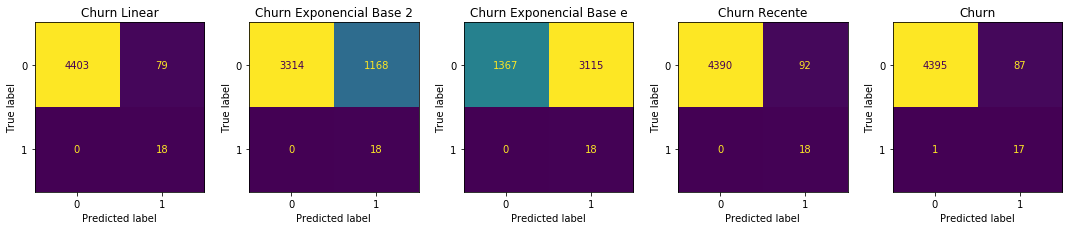

In [10]:
r2, CM = validacaoR2MatrizConfusao(
            real, 
            predict = [linear, exp2, expE, recente, churn], 
            titulos = ["Churn Linear", "Churn Exponencial Base 2", "Churn Exponencial Base e", "Churn Recente", "Churn"], 
            tamanhos = (15,8)
            )

In [11]:
print("Churn Linear:")
calculaValoresAvaliacao(linear, real)
print("\n\n")
print("Churn Exponencial Base 2:")
calculaValoresAvaliacao(exp2, real)
print("\n\n")
print("Churn Exponencial Base e:")
calculaValoresAvaliacao(expE, real)
print("\n\n")
print("Churn Recente:")
calculaValoresAvaliacao(recente, real)
print("\n\n")
print("Churn:")
calculaValoresAvaliacao(churn, real)

Churn Linear:
Acurácia: 98.24%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        100.00       98.24        99.11       
1.0        18.56        100.00       31.30       



Churn Exponencial Base 2:
Acurácia: 74.04%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        100.00       73.94        85.02       
1.0        1.52         100.00       2.99        



Churn Exponencial Base e:
Acurácia: 30.78%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        100.00       30.50        46.74       
1.0        0.57         100.00       1.14        



Churn Recente:
Acurácia: 97.96%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        100.00       97.95        98.96       
1.0        16.36        100.00       28.12       



Churn:
Acurácia: 98.04%

Classe     Precisão     Re